# Libraries

In [1]:
# import relevant libraries
!pip install ondemand
!pip install py_vollib
import datetime
import py_vollib 
import ondemand
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
from scipy import stats
from datetime import datetime
from statsmodels.formula.api import ols
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics as sklMetrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from py_vollib.black_scholes_merton  import black_scholes_merton as bsm
from py_vollib.black_scholes_merton.implied_volatility import implied_volatility as iv
from py_vollib.black_scholes_merton.greeks.analytical import delta 
from py_vollib.black_scholes_merton.greeks.analytical import gamma
from py_vollib.black_scholes_merton.greeks.analytical import rho
from py_vollib.black_scholes_merton.greeks.analytical import theta
from py_vollib.black_scholes_merton.greeks.analytical import vega
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Functions

In [2]:
# function to syntesize historical greeks and IV
def greek_val(flag, S, K, t, r, sigma):
    """
    price (float) – the Black-Scholes-Merton (American) option price
    S (float) – underlying asset price
    sigma (float) – annualized standard deviation, or volatility
    K (float) – strike price
    t (float) – time to expiration in years
    r (float) – risk-free interest rate
    flag (str) – ‘c’ or ‘p’ for call or put.
    """
    price = bsm(flag, S, K, t, r, sigma, 0)
    imp_v = iv(price, S, K, t, r, 0, flag)
    delta_calc = delta(flag, S, K, t, r, sigma, 0)
    gamma_calc = gamma(flag, S, K, t, r, sigma, 0)
    rho_calc = rho(flag, S, K, t, r, sigma, 0)
    theta_calc = theta(flag, S, K, t, r, sigma, 0)
    vega_calc = vega(flag, S, K, t, r, sigma, 0)
    return np.array([price, imp_v ,theta_calc, delta_calc ,rho_calc ,vega_calc ,gamma_calc])

In [3]:
# function for correlation matrix
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    sns.set_style(style = 'white')
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [4]:
# WIP mapping functions
def call_map(x):
    if x > 5:
        return 'BUY'
    elif x < -10:
        return 'WRITE'
    else:
        return 'HOLD'
def put_map(x):
    if x != 0:
        return 'WRITE'
    elif x == 0:
        return 'BUY'
    else:
        return 'HOLD'

# Import & Process Data

In [5]:
# read-in dataframes
underlying_df = pd.read_csv('hgh21_daily_historical-data-02-08-2021.csv')[0:450]
underlying_df.reset_index(drop=True, inplace=True)
put_op_75 = pd.read_csv('hgh1|75p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_100 = pd.read_csv('hgh1|100p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_125 = pd.read_csv('hgh1|125p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_150 = pd.read_csv('hgh1|150p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_175 = pd.read_csv('hgh1|175p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_200 = pd.read_csv('hgh1|200p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_225 = pd.read_csv('hgh1|225p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_250 = pd.read_csv('hgh1|250p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_275 = pd.read_csv('hgh1|275p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_300 = pd.read_csv('hgh1|300p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_325 = pd.read_csv('hgh1|325p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_350 = pd.read_csv('hgh1|350p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_375 = pd.read_csv('hgh1|375p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_400 = pd.read_csv('hgh1|400p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_425 = pd.read_csv('hgh1|425p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_450 = pd.read_csv('hgh1|450p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_475 = pd.read_csv('hgh1|475p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_500 = pd.read_csv('hgh1|500p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_525 = pd.read_csv('hgh1|525p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_550 = pd.read_csv('hgh1|550p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_575 = pd.read_csv('hgh1|575p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_600 = pd.read_csv('hgh1|600p_daily_historical-data-02-08-2021.csv')[:-1]
put_op_625 = pd.read_csv('hgh1|625p_daily_historical-data-02-08-2021.csv')[:-1]

expiration = pd.to_datetime('02/28/2021')

underlying_df['days_to_exp'] = [(expiration - pd.to_datetime(underlying_df.iloc[i]['Time'])).total_seconds()/86400
                                for i in range(len(underlying_df))]

underlying_df['uHigh'] = underlying_df['High']
underlying_df['uLow'] = underlying_df['Low']
underlying_df['uLast'] = underlying_df['Last']
underlying_df['uChange'] = underlying_df['Change']
underlying_df['u%Chg'] = underlying_df['%Chg']
underlying_df['uOpenInt'] = underlying_df['Open Int']
underlying_df.drop(columns=['Time', 'High', 'Low', 'Last', 'Change', '%Chg', 'Open', 'Open Int'], inplace=True)

put_op_75['strike'] = 75
put_op_100['strike'] = 100 
put_op_125['strike'] = 125 
put_op_150['strike'] = 150 
put_op_175['strike'] = 175 
put_op_200['strike'] = 200 
put_op_225['strike'] = 225 
put_op_250['strike'] = 250 
put_op_275['strike'] = 275 
put_op_300['strike'] = 300 
put_op_325['strike'] = 325 
put_op_350['strike'] = 350 
put_op_375['strike'] = 375 
put_op_400['strike'] = 400 
put_op_425['strike'] = 425 
put_op_450['strike'] = 450 
put_op_475['strike'] = 475 
put_op_500['strike'] = 500 
put_op_525['strike'] = 525 
put_op_550['strike'] = 550 
put_op_575['strike'] = 575 
put_op_600['strike'] = 600 
put_op_625['strike'] = 625

put_op_75['spotDist'] = put_op_75['strike'] - underlying_df['uLast']*100
put_op_100['spotDist'] = put_op_100['strike'] - underlying_df['uLast']*100 
put_op_125['spotDist'] = put_op_125['strike'] - underlying_df['uLast']*100 
put_op_150['spotDist'] = put_op_150['strike'] - underlying_df['uLast']*100 
put_op_175['spotDist'] = put_op_175['strike'] - underlying_df['uLast']*100 
put_op_200['spotDist'] = put_op_200['strike'] - underlying_df['uLast']*100 
put_op_225['spotDist'] = put_op_225['strike'] - underlying_df['uLast']*100 
put_op_250['spotDist'] = put_op_250['strike'] - underlying_df['uLast']*100 
put_op_275['spotDist'] = put_op_275['strike'] - underlying_df['uLast']*100 
put_op_300['spotDist'] = put_op_300['strike'] - underlying_df['uLast']*100 
put_op_325['spotDist'] = put_op_325['strike'] - underlying_df['uLast']*100 
put_op_350['spotDist'] = put_op_350['strike'] - underlying_df['uLast']*100 
put_op_375['spotDist'] = put_op_375['strike'] - underlying_df['uLast']*100 
put_op_400['spotDist'] = put_op_400['strike'] - underlying_df['uLast']*100 
put_op_425['spotDist'] = put_op_425['strike'] - underlying_df['uLast']*100 
put_op_450['spotDist'] = put_op_450['strike'] - underlying_df['uLast']*100 
put_op_475['spotDist'] = put_op_475['strike'] - underlying_df['uLast']*100 
put_op_500['spotDist'] = put_op_500['strike'] - underlying_df['uLast']*100 
put_op_525['spotDist'] = put_op_525['strike'] - underlying_df['uLast']*100 
put_op_550['spotDist'] = put_op_550['strike'] - underlying_df['uLast']*100 
put_op_575['spotDist'] = put_op_575['strike'] - underlying_df['uLast']*100 
put_op_600['spotDist'] = put_op_600['strike'] - underlying_df['uLast']*100 
put_op_625['spotDist'] = put_op_625['strike'] - underlying_df['uLast']*100

put_op_75['uVolume'] = underlying_df['Volume'] 
put_op_100['uVolume'] = underlying_df['Volume'] 
put_op_125['uVolume'] = underlying_df['Volume'] 
put_op_150['uVolume'] = underlying_df['Volume'] 
put_op_175['uVolume'] = underlying_df['Volume'] 
put_op_200['uVolume'] = underlying_df['Volume'] 
put_op_225['uVolume'] = underlying_df['Volume'] 
put_op_250['uVolume'] = underlying_df['Volume'] 
put_op_275['uVolume'] = underlying_df['Volume'] 
put_op_300['uVolume'] = underlying_df['Volume'] 
put_op_325['uVolume'] = underlying_df['Volume'] 
put_op_350['uVolume'] = underlying_df['Volume'] 
put_op_375['uVolume'] = underlying_df['Volume'] 
put_op_400['uVolume'] = underlying_df['Volume'] 
put_op_425['uVolume'] = underlying_df['Volume'] 
put_op_450['uVolume'] = underlying_df['Volume'] 
put_op_475['uVolume'] = underlying_df['Volume'] 
put_op_500['uVolume'] = underlying_df['Volume'] 
put_op_525['uVolume'] = underlying_df['Volume'] 
put_op_550['uVolume'] = underlying_df['Volume'] 
put_op_575['uVolume'] = underlying_df['Volume'] 
put_op_600['uVolume'] = underlying_df['Volume'] 
put_op_625['uVolume'] = underlying_df['Volume']
underlying_df.drop(columns=['Volume'], inplace=True)

put_op_75['oVolume'] =  put_op_75['Volume']
put_op_100['oVolume'] = put_op_100['Volume']
put_op_125['oVolume'] = put_op_125['Volume'] 
put_op_150['oVolume'] = put_op_150['Volume'] 
put_op_175['oVolume'] = put_op_175['Volume'] 
put_op_200['oVolume'] = put_op_200['Volume'] 
put_op_225['oVolume'] = put_op_225['Volume'] 
put_op_250['oVolume'] = put_op_250['Volume'] 
put_op_275['oVolume'] = put_op_275['Volume'] 
put_op_300['oVolume'] = put_op_300['Volume'] 
put_op_325['oVolume'] = put_op_325['Volume'] 
put_op_350['oVolume'] = put_op_350['Volume'] 
put_op_375['oVolume'] = put_op_375['Volume'] 
put_op_400['oVolume'] = put_op_400['Volume'] 
put_op_425['oVolume'] = put_op_425['Volume'] 
put_op_450['oVolume'] = put_op_450['Volume'] 
put_op_475['oVolume'] = put_op_475['Volume'] 
put_op_500['oVolume'] = put_op_500['Volume'] 
put_op_525['oVolume'] = put_op_525['Volume'] 
put_op_550['oVolume'] = put_op_550['Volume'] 
put_op_575['oVolume'] = put_op_575['Volume'] 
put_op_600['oVolume'] = put_op_600['Volume'] 
put_op_625['oVolume'] = put_op_625['Volume']

# create low boundary for trading interval
low_bound = [underlying_df['uLow'][::-1][0]]
temp = underlying_df['uLow'][::-1]
for i in range(1, len(underlying_df)):
    if temp[i] <= min(low_bound):
        low_bound.append(temp[i])
    else:
        low_bound.append(low_bound[-1])
low_bound = low_bound
underlying_df['low_bound'] = low_bound

# create high boundary for trading interval
high_bound = [underlying_df['uHigh'][::-1][0]]
temp = underlying_df['uHigh'][::-1]
for i in range(1, len(underlying_df)):
    if temp[i] >= max(high_bound):
        high_bound.append(temp[i])
    else:
        high_bound.append(high_bound[-1])
high_bound = high_bound
underlying_df['high_bound'] = high_bound

put_op_75 = pd.concat([put_op_75, underlying_df], axis=1)
put_op_100 = pd.concat([put_op_100, underlying_df], axis=1)
put_op_125 = pd.concat([put_op_125, underlying_df], axis=1)
put_op_150 = pd.concat([put_op_150, underlying_df], axis=1)
put_op_175 = pd.concat([put_op_175, underlying_df], axis=1)
put_op_200 = pd.concat([put_op_200, underlying_df], axis=1)
put_op_225 = pd.concat([put_op_225, underlying_df], axis=1)
put_op_250 = pd.concat([put_op_250, underlying_df], axis=1)
put_op_275 = pd.concat([put_op_275, underlying_df], axis=1)
put_op_300 = pd.concat([put_op_300, underlying_df], axis=1)
put_op_325 = pd.concat([put_op_325, underlying_df], axis=1)
put_op_350 = pd.concat([put_op_350, underlying_df], axis=1)
put_op_375 = pd.concat([put_op_375, underlying_df], axis=1)
put_op_400 = pd.concat([put_op_400, underlying_df], axis=1)
put_op_425 = pd.concat([put_op_425, underlying_df], axis=1)
put_op_450 = pd.concat([put_op_450, underlying_df], axis=1)
put_op_475 = pd.concat([put_op_475, underlying_df], axis=1)
put_op_500 = pd.concat([put_op_500, underlying_df], axis=1)
put_op_525 = pd.concat([put_op_525, underlying_df], axis=1)
put_op_550 = pd.concat([put_op_550, underlying_df], axis=1)
put_op_575 = pd.concat([put_op_575, underlying_df], axis=1)
put_op_600 = pd.concat([put_op_600, underlying_df], axis=1)
put_op_625 = pd.concat([put_op_625, underlying_df], axis=1)

put_op_list = [put_op_75,
               put_op_100,
               put_op_125,
               put_op_150,
               put_op_175,
               put_op_200,
               put_op_225,
               put_op_250,
               put_op_275,
               put_op_300,
               put_op_325,
               put_op_350,
               put_op_375,
               put_op_400,
               put_op_425,
               put_op_450,
               put_op_475,
               put_op_500,
               put_op_525,
               put_op_550,
               put_op_575,
               put_op_600,
               put_op_625]

put_greek = []
for contract in put_op_list:
    
    writable = []
    buyable = []
    for day in range(len(contract)):
        if ((float(contract.iloc[day]['oVolume'])+float(contract.iloc[day]['Open Int'])) != 0):
            if contract.iloc[day]['strike']/100 <= contract.iloc[day]['low_bound']:
                writable.append(contract.iloc[day]['strike']/100)
            else:
                writable.append(0)
            if contract.iloc[day]['strike']/100 >= contract.iloc[day]['high_bound']:
                buyable.append(contract.iloc[day]['strike']/100)
            else:
                buyable.append(0)
        else:
            buyable.append(0)
            writable.append(0)
            
    greek_df = pd.DataFrame([greek_val('p',
                                         contract['uLast'][i],
                                         contract['strike'][i],
                                         (contract['days_to_exp'][i])/365,
                                         0,
                                         contract['uLast'][i:].std())
                              for i in range(len(contract))],
                             columns=['price','imp_v','theta','delta','rho','vega','gamma'])
    contract['write_op'] = writable
    contract['buy_op'] = buyable
    contract = pd.concat([contract, greek_df], axis=1)
    put_greek.append(contract)
put_op_df = pd.concat(put_greek)
put_op_df['oHigh'] = put_op_df['High']
put_op_df['oLow'] = put_op_df['Low']
put_op_df['oLast'] = put_op_df['Last']
put_op_df['oChange'] = put_op_df['Change']
put_op_df['o%Chg'] = put_op_df['%Chg']
put_op_df['oOpenInt'] = put_op_df['Open Int']
put_op_df.drop(columns=['Time', 'Volume', 'Open', 'High', 'Low', 'Last', 'Change', '%Chg', 'Open Int'], inplace=True)

# strip +/- and % sign from IV_Skew
new_one = []
new_two = []
for i in range(len(put_op_df)):
    line = put_op_df.iloc[i]['o%Chg']
    line = re.sub('[-%+,@]', '', line)
    new_one.append(line)
    line = put_op_df.iloc[i]['u%Chg']
    line = re.sub('[-%+,@]', '', line)
    new_two.append(line)
put_op_df['o%Chg'] = new_one
put_op_df['u%Chg'] = new_two

put_op_df.astype('float64')

target = []
for i in range(len(put_op_df)):
    if put_op_df.iloc[i]['buy_op'] != 0:
        target.append('BUY')
    elif put_op_df.iloc[i]['write_op'] != 0:
        target.append('WRITE')
    else:
        target.append('HOLD')
put_op_df['target'] = target


# Visualizations

In [6]:
put_op_df

,strike,spotDist,uVolume,oVolume,days_to_exp,uHigh,uLow,uLast,uChange,u%Chg,uOpenInt,low_bound,high_bound,write_op,buy_op,price,imp_v,theta,delta,rho,vega,gamma,oHigh,oLow,oLast,oChange,o%Chg,oOpenInt,target
0,75,-291.60,79906.0,0.0,20.0,3.6800,3.6225,3.6660,0.0400,1.10,0.0,3.6225,3.680,0.0,0.0,71.3340,0.0,-2.410014e-317,-1.0,-0.041096,2.846222e-317,1.141132e-314,0.0005,0.0005,0.0005,0.0000,0.00,0.0,HOLD
1,75,-287.60,83459.0,0.0,23.0,3.6400,3.5515,3.6260,0.0730,2.05,135339.0,3.5515,3.680,0.0,0.0,71.3740,0.0,-1.696169e-281,-1.0,-0.047260,2.316882e-281,8.304058e-279,0.0005,0.0005,0.0005,0.0000,0.00,0.0,HOLD
2,75,-280.30,66302.0,0.0,24.0,3.5830,3.5370,3.5530,-0.0125,0.35,141548.0,3.5370,3.680,0.0,0.0,71.4470,0.0,-2.521862e-276,-1.0,-0.049315,3.613244e-276,1.299341e-273,0.0005,0.0005,0.0005,0.0000,0.00,0.0,HOLD
3,75,-281.55,70465.0,0.0,25.0,3.5730,3.5035,3.5655,0.0410,1.16,145718.0,3.5035,3.680,0.0,0.0,71.4345,0.0,-5.531489e-267,-1.0,-0.051370,8.290140e-267,2.853801e-264,0.0005,0.0005,0.0005,0.0000,0.00,0.0,HOLD
4,75,-277.45,85090.0,0.0,26.0,3.5690,3.5000,3.5245,-0.0215,0.61,145643.0,3.5000,3.680,0.0,0.0,71.4755,0.0,-4.734705e-261,-1.0,-0.053425,7.412706e-261,2.522213e-258,0.0005,0.0005,0.0005,0.0000,0.00,0.0,HOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,625,337.20,12.0,0.0,667.0,2.8780,2.8780,2.8780,0.0350,1.23,75.0,2.0650,3.734,0.0,0.0,622.1220,0.0,0.000000e+00,-1.0,-11.421233,0.000000e+00,0.000000e+00,3.3720,3.3720,3.3720,-0.0350,1.03,0.0,HOLD
446,625,340.70,1.0,0.0,668.0,2.8430,2.8430,2.8430,-0.0295,1.03,63.0,2.0650,3.734,0.0,0.0,622.1570,0.0,0.000000e+00,-1.0,-11.438356,0.000000e+00,0.000000e+00,3.4070,3.4070,3.4070,0.0295,0.87,0.0,HOLD
447,625,337.75,0.0,0.0,669.0,2.8725,2.8725,2.8725,-0.0985,3.32,62.0,2.0650,3.734,0.0,0.0,622.1275,0.0,0.000000e+00,-1.0,-11.455479,0.000000e+00,0.000000e+00,3.3775,3.3775,3.3775,0.0985,3.00,0.0,HOLD
448,625,327.90,0.0,0.0,670.0,2.9710,2.9710,2.9710,0.0075,0.25,62.0,2.0650,3.734,0.0,0.0,622.0290,0.0,0.000000e+00,-1.0,-11.472603,0.000000e+00,0.000000e+00,3.2790,3.2790,3.2790,-0.0075,0.23,0.0,HOLD


### Daily Trading Interval

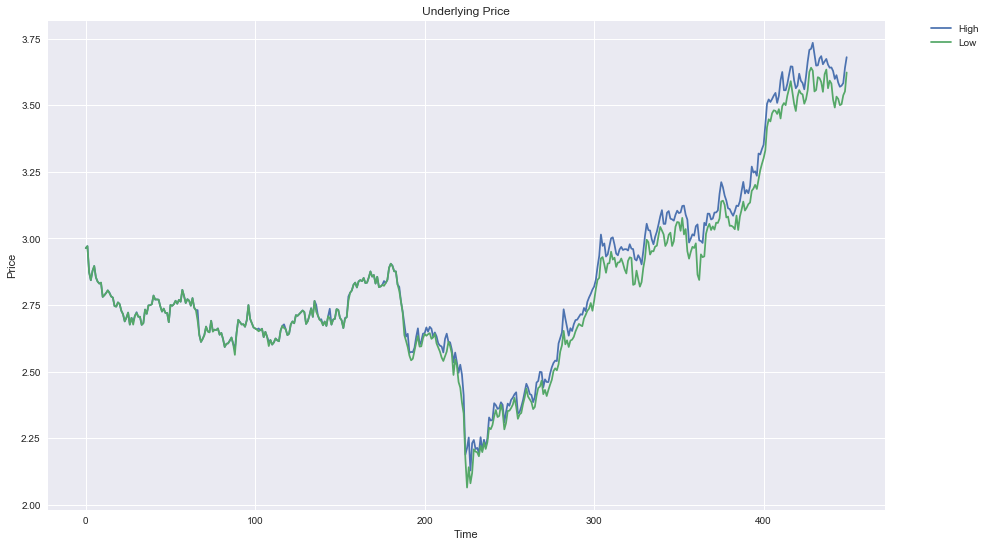

In [7]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))
plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], label='High')
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], label='Low')
plt.title('Underlying Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Underlying Price & Options Premia

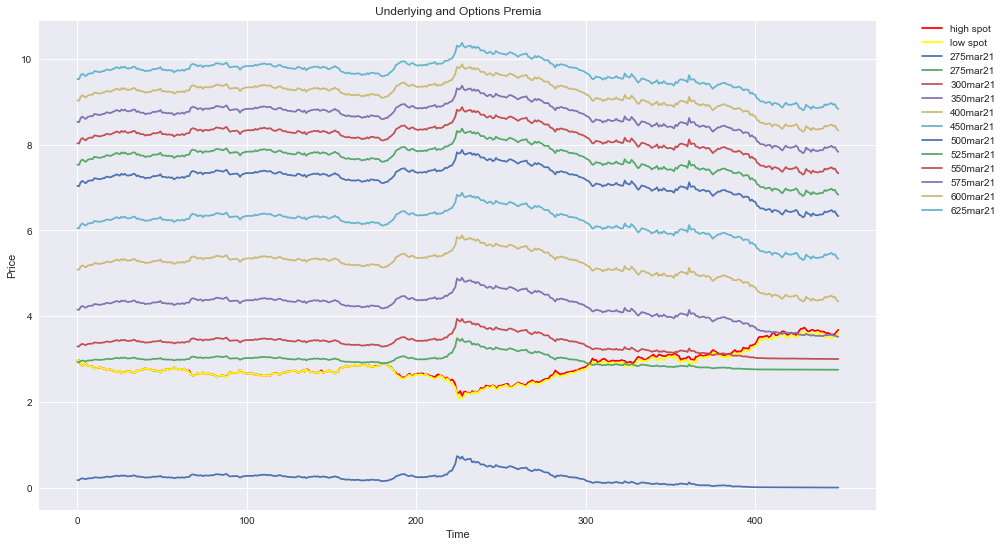

In [8]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))

plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], color='red', label='high spot')
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], color='yellow', label='low spot')

plt.plot(underlying_df.index[start:end], put_op_275['High'][::-1][start:end], label="275mar21")
plt.plot(underlying_df.index[start:end], put_op_275['Last'][::-1][start:end] + put_op_275['strike'][::-1][start:end]/100, label="275mar21")

plt.plot(underlying_df.index[start:end], put_op_300['Last'][::-1][start:end] + put_op_300['strike'][::-1][start:end]/100, label="300mar21")

plt.plot(underlying_df.index[start:end], put_op_350['Last'][::-1][start:end] + put_op_350['strike'][::-1][start:end]/100, label="350mar21")

plt.plot(underlying_df.index[start:end], put_op_400['Last'][::-1][start:end] + put_op_400['strike'][::-1][start:end]/100, label="400mar21")

plt.plot(underlying_df.index[start:end], put_op_450['Last'][::-1][start:end] + put_op_450['strike'][::-1][start:end]/100, label="450mar21")

plt.plot(underlying_df.index[start:end], put_op_500['Last'][::-1][start:end] + put_op_500['strike'][::-1][start:end]/100, label="500mar21")

plt.plot(underlying_df.index[start:end], put_op_525['Last'][::-1][start:end] + put_op_525['strike'][::-1][start:end]/100, label="525mar21")

plt.plot(underlying_df.index[start:end], put_op_550['Last'][::-1][start:end] + put_op_550['strike'][::-1][start:end]/100, label="550mar21")

plt.plot(underlying_df.index[start:end], put_op_575['Last'][::-1][start:end] + put_op_575['strike'][::-1][start:end]/100, label="575mar21")

plt.plot(underlying_df.index[start:end], put_op_600['Last'][::-1][start:end] + put_op_600['strike'][::-1][start:end]/100, label="600mar21")
plt.plot(underlying_df.index[start:end], put_op_625['Last'][::-1][start:end] + put_op_625['strike'][::-1][start:end]/100, label="625mar21")
plt.title('Underlying and Options Premia')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

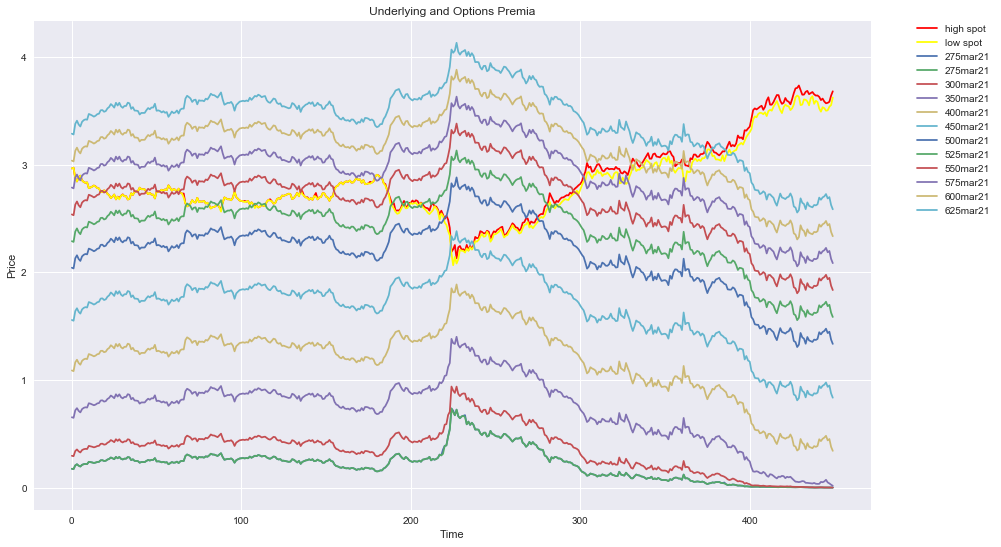

In [9]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))

plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], color='red', label='high spot')
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], color='yellow', label='low spot')

plt.plot(underlying_df.index[start:end], put_op_275['High'][::-1][start:end], label="275mar21")
plt.plot(underlying_df.index[start:end], put_op_275['Low'][::-1][start:end], label="275mar21")

plt.plot(underlying_df.index[start:end], put_op_300['Low'][::-1][start:end], label="300mar21")

plt.plot(underlying_df.index[start:end], put_op_350['Low'][::-1][start:end], label="350mar21")

plt.plot(underlying_df.index[start:end], put_op_400['Low'][::-1][start:end], label="400mar21")

plt.plot(underlying_df.index[start:end], put_op_450['Low'][::-1][start:end], label="450mar21")

plt.plot(underlying_df.index[start:end], put_op_500['Low'][::-1][start:end], label="500mar21")

plt.plot(underlying_df.index[start:end], put_op_525['Low'][::-1][start:end], label="525mar21")

plt.plot(underlying_df.index[start:end], put_op_550['Low'][::-1][start:end], label="550mar21")

plt.plot(underlying_df.index[start:end], put_op_575['Low'][::-1][start:end], label="575mar21")

plt.plot(underlying_df.index[start:end], put_op_600['Low'][::-1][start:end], label="600mar21")

plt.plot(underlying_df.index[start:end], put_op_625['Low'][::-1][start:end], label="625mar21")
plt.title('Underlying and Options Premia')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Volume & Open Interest - Combined

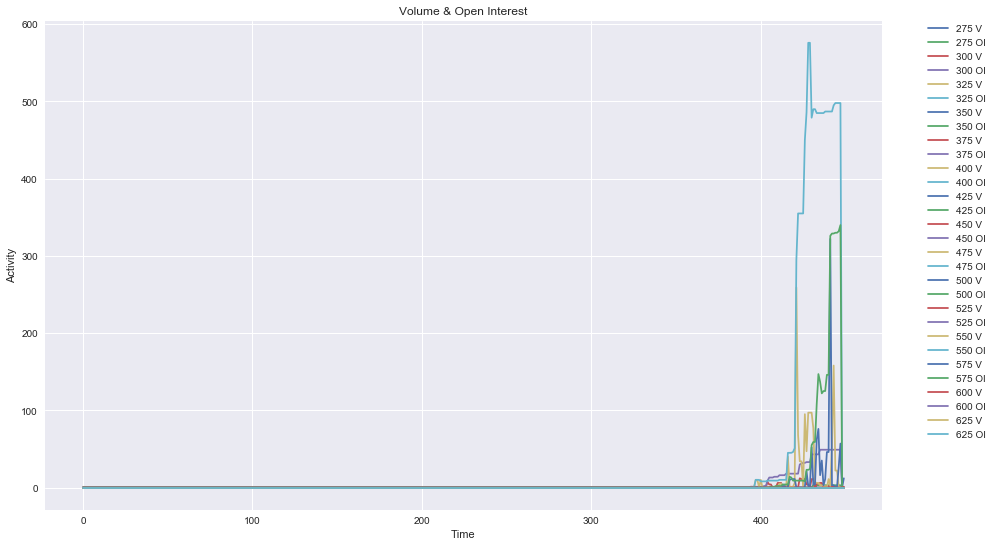

In [10]:
start = 0
end = len(underlying_df)
plt.figure(figsize=(15,9))


plt.plot(underlying_df.index[start:end], put_op_275['Volume'][::-1][start:end], label="275 V")
plt.plot(underlying_df.index[start:end], put_op_275['Open Int'][::-1][start:end], label="275 OI")

plt.plot(underlying_df.index[start:end], put_op_300['Volume'][::-1][start:end], label="300 V")
plt.plot(underlying_df.index[start:end], put_op_300['Open Int'][::-1][start:end], label="300 OI")

plt.plot(underlying_df.index[start:end], put_op_325['Volume'][::-1][start:end], label="325 V")
plt.plot(underlying_df.index[start:end], put_op_325['Open Int'][::-1][start:end], label="325 OI")

plt.plot(underlying_df.index[start:end], put_op_350['Volume'][::-1][start:end], label="350 V")
plt.plot(underlying_df.index[start:end], put_op_350['Open Int'][::-1][start:end], label="350 OI")

plt.plot(underlying_df.index[start:end], put_op_375['Volume'][::-1][start:end], label="375 V")
plt.plot(underlying_df.index[start:end], put_op_375['Open Int'][::-1][start:end], label="375 OI")

plt.plot(underlying_df.index[start:end], put_op_400['Volume'][::-1][start:end], label="400 V")
plt.plot(underlying_df.index[start:end], put_op_400['Open Int'][::-1][start:end], label="400 OI")

plt.plot(underlying_df.index[start:end], put_op_425['Volume'][::-1][start:end], label="425 V")
plt.plot(underlying_df.index[start:end], put_op_425['Open Int'][::-1][start:end], label="425 OI")

plt.plot(underlying_df.index[start:end], put_op_450['Volume'][::-1][start:end], label="450 V")
plt.plot(underlying_df.index[start:end], put_op_450['Open Int'][::-1][start:end], label="450 OI")

plt.plot(underlying_df.index[start:end], put_op_475['Volume'][::-1][start:end], label="475 V")
plt.plot(underlying_df.index[start:end], put_op_475['Open Int'][::-1][start:end], label="475 OI")

plt.plot(underlying_df.index[start:end], put_op_500['Volume'][::-1][start:end], label="500 V")
plt.plot(underlying_df.index[start:end], put_op_500['Open Int'][::-1][start:end], label="500 OI")

plt.plot(underlying_df.index[start:end], put_op_525['Volume'][::-1][start:end], label="525 V")
plt.plot(underlying_df.index[start:end], put_op_525['Open Int'][::-1][start:end], label="525 OI")

plt.plot(underlying_df.index[start:end], put_op_550['Volume'][::-1][start:end], label="550 V")
plt.plot(underlying_df.index[start:end], put_op_550['Open Int'][::-1][start:end], label="550 OI")

plt.plot(underlying_df.index[start:end], put_op_575['Volume'][::-1][start:end], label="575 V")
plt.plot(underlying_df.index[start:end], put_op_575['Open Int'][::-1][start:end], label="575 OI")

plt.plot(underlying_df.index[start:end], put_op_600['Volume'][::-1][start:end], label="600 V")
plt.plot(underlying_df.index[start:end], put_op_600['Open Int'][::-1][start:end], label="600 OI")

plt.plot(underlying_df.index[start:end], put_op_625['Volume'][::-1][start:end], label="625 V")
plt.plot(underlying_df.index[start:end], put_op_625['Open Int'][::-1][start:end], label="625 OI")
plt.title('Volume & Open Interest')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Volume & Open Interest - Individual

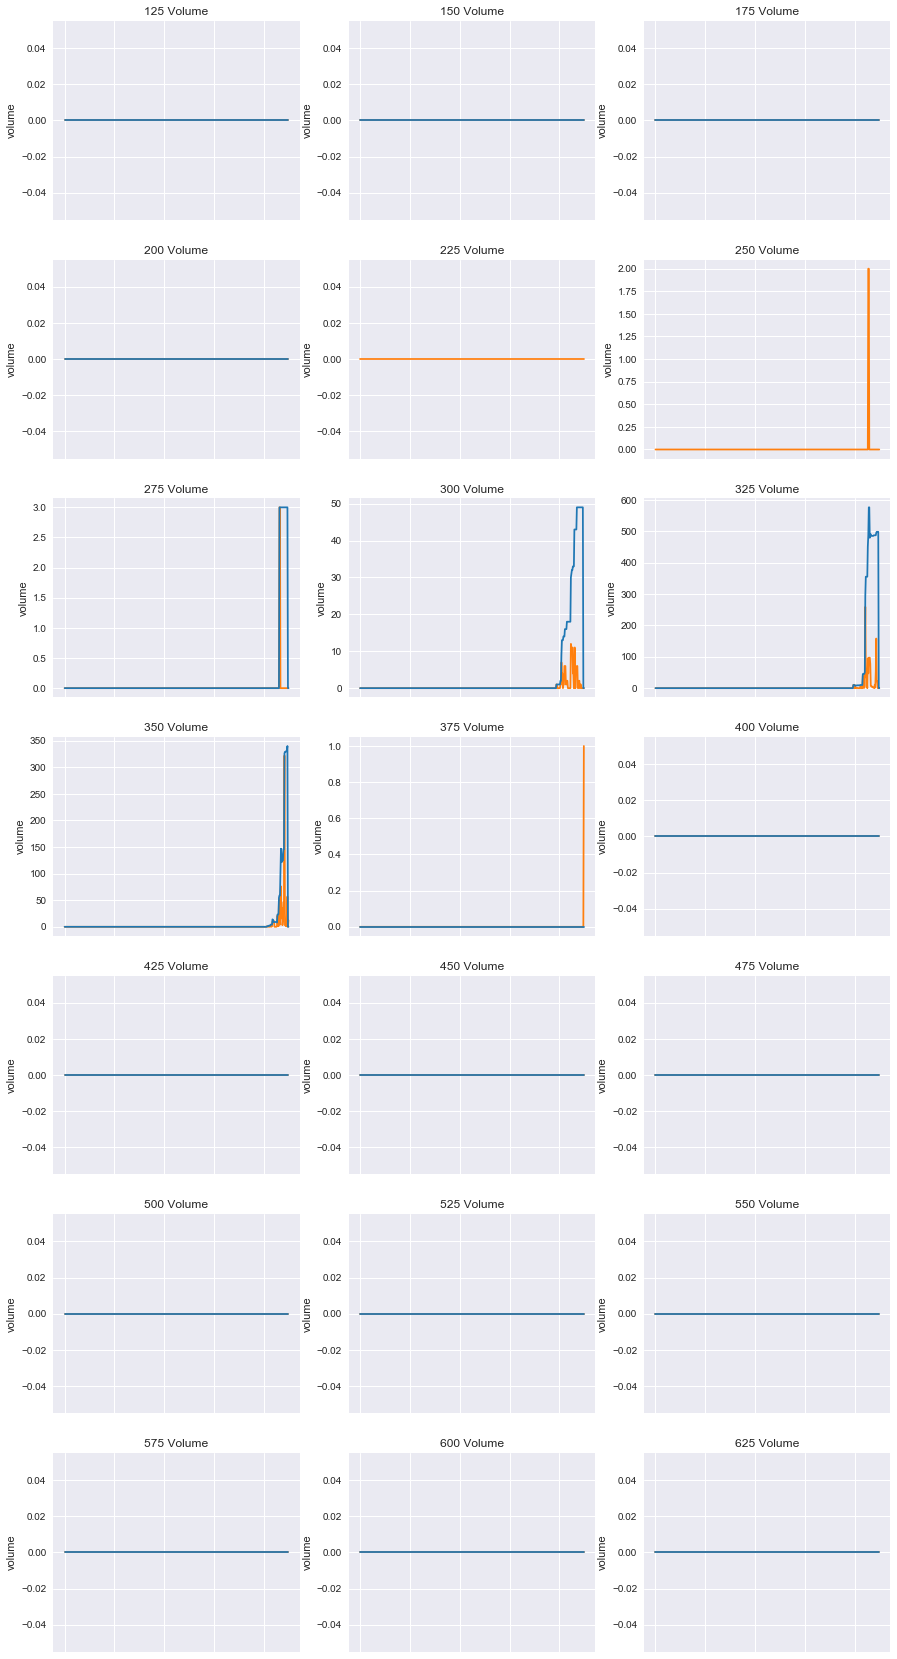

In [11]:
start = 0
end = len(underlying_df)
fig, axs = plt.subplots(7, 3)
fig.set_figheight(30)
fig.set_figwidth(15)

axs[0, 0].plot(underlying_df.index[start:end], put_op_125['Volume'][::-1][start:end], 'tab:orange')
axs[0, 0].plot(underlying_df.index[start:end], put_op_125['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 0].set_title('125 Volume')
axs[0, 1].plot(underlying_df.index[start:end], put_op_150['Volume'][::-1][start:end], 'tab:orange')
axs[0, 1].plot(underlying_df.index[start:end], put_op_150['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 1].set_title('150 Volume')
axs[0, 2].plot(underlying_df.index[start:end], put_op_175['Volume'][::-1][start:end], 'tab:orange')
axs[0, 2].plot(underlying_df.index[start:end], put_op_175['Open Int'][::-1][start:end], 'tab:blue')
axs[0, 2].set_title('175 Volume')

axs[1, 0].plot(underlying_df.index[start:end], put_op_200['Volume'][::-1][start:end], 'tab:orange')
axs[1, 0].plot(underlying_df.index[start:end], put_op_200['Open Int'][::-1][start:end], 'tab:blue')
axs[1, 0].set_title('200 Volume')
axs[1, 1].plot(underlying_df.index[start:end], put_op_225['Volume'][::-1][start:end], 'tab:orange')
axs[1, 1].set_title('225 Volume')
axs[1, 2].plot(underlying_df.index[start:end], put_op_250['Volume'][::-1][start:end], 'tab:orange')
axs[1, 2].set_title('250 Volume')

axs[2, 0].plot(underlying_df.index[start:end], put_op_275['Volume'][::-1][start:end], 'tab:orange')
axs[2, 0].plot(underlying_df.index[start:end], put_op_275['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 0].set_title('275 Volume')
axs[2, 1].plot(underlying_df.index[start:end], put_op_300['Volume'][::-1][start:end], 'tab:orange')
axs[2, 1].plot(underlying_df.index[start:end], put_op_300['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 1].set_title('300 Volume')
axs[2, 2].plot(underlying_df.index[start:end], put_op_325['Volume'][::-1][start:end], 'tab:orange')
axs[2, 2].plot(underlying_df.index[start:end], put_op_325['Open Int'][::-1][start:end], 'tab:blue')
axs[2, 2].set_title('325 Volume')


axs[3, 0].plot(underlying_df.index[start:end], put_op_350['Volume'][::-1][start:end], 'tab:orange')
axs[3, 0].plot(underlying_df.index[start:end], put_op_350['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 0].set_title('350 Volume')
axs[3, 1].plot(underlying_df.index[start:end], put_op_375['Volume'][::-1][start:end], 'tab:orange')
axs[3, 1].plot(underlying_df.index[start:end], put_op_375['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 1].set_title('375 Volume')
axs[3, 2].plot(underlying_df.index[start:end], put_op_400['Volume'][::-1][start:end], 'tab:orange')
axs[3, 2].plot(underlying_df.index[start:end], put_op_400['Open Int'][::-1][start:end], 'tab:blue')
axs[3, 2].set_title('400 Volume')


axs[4, 0].plot(underlying_df.index[start:end], put_op_425['Volume'][::-1][start:end], 'tab:orange')
axs[4, 0].plot(underlying_df.index[start:end], put_op_425['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 0].set_title('425 Volume')
axs[4, 1].plot(underlying_df.index[start:end], put_op_450['Volume'][::-1][start:end], 'tab:orange')
axs[4, 1].plot(underlying_df.index[start:end], put_op_450['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 1].set_title('450 Volume')
axs[4, 2].plot(underlying_df.index[start:end], put_op_475['Volume'][::-1][start:end], 'tab:orange')
axs[4, 2].plot(underlying_df.index[start:end], put_op_475['Open Int'][::-1][start:end], 'tab:blue')
axs[4, 2].set_title('475 Volume')

axs[5, 0].plot(underlying_df.index[start:end], put_op_500['Volume'][::-1][start:end], 'tab:orange')
axs[5, 0].plot(underlying_df.index[start:end], put_op_500['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 0].set_title('500 Volume')
axs[5, 1].plot(underlying_df.index[start:end], put_op_525['Volume'][::-1][start:end], 'tab:orange')
axs[5, 1].plot(underlying_df.index[start:end], put_op_525['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 1].set_title('525 Volume')
axs[5, 2].plot(underlying_df.index[start:end], put_op_550['Volume'][::-1][start:end], 'tab:orange')
axs[5, 2].plot(underlying_df.index[start:end], put_op_550['Open Int'][::-1][start:end], 'tab:blue')
axs[5, 2].set_title('550 Volume')

axs[6, 0].plot(underlying_df.index[start:end], put_op_575['Volume'][::-1][start:end], 'tab:orange')
axs[6, 0].plot(underlying_df.index[start:end], put_op_575['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 0].set_title('575 Volume')
axs[6, 1].plot(underlying_df.index[start:end], put_op_600['Volume'][::-1][start:end], 'tab:orange')
axs[6, 1].plot(underlying_df.index[start:end], put_op_600['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 1].set_title('600 Volume')
axs[6, 2].plot(underlying_df.index[start:end], put_op_625['Volume'][::-1][start:end], 'tab:orange')
axs[6, 2].plot(underlying_df.index[start:end], put_op_625['Open Int'][::-1][start:end], 'tab:blue')
axs[6, 2].set_title('625 Volume')


for ax in axs.flat:
    ax.set(xlabel='', ylabel='volume')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    #ax.label_outer()
    ax.set_xticklabels([])

### Trading Interval &  Write/Buy Opportunitites

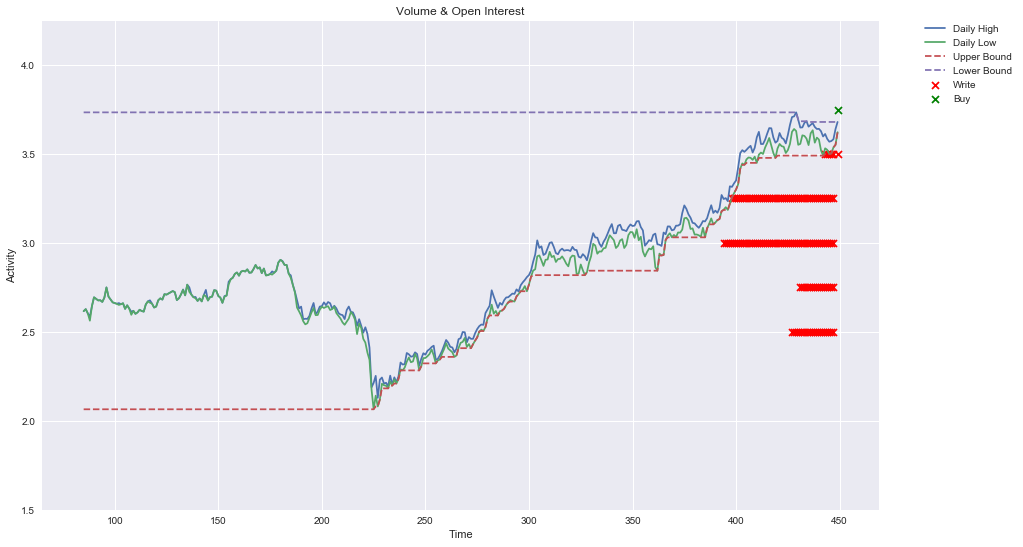

In [12]:
# plot construction
start = -365
end = len(underlying_df)
plt.figure(figsize=(15,9))
plt.ylim(1.5,4.25)
plt.ylabel('Spot Price')
plt.xlabel('Date')

# underlying futures price
plt.plot(underlying_df.index[start:end], underlying_df['uHigh'][::-1][start:end], label="Daily High")
plt.plot(underlying_df.index[start:end], underlying_df['uLow'][::-1][start:end], label="Daily Low")

# trading intervals
plt.plot(underlying_df.index[start:end], underlying_df['low_bound'][::-1][start:end], '--', label="Upper Bound")
plt.plot(underlying_df.index[start:end], underlying_df['high_bound'][::-1][start:end], '--', label="Lower Bound")

# trade opportunities
for contract in put_greek:
    if contract['strike'][5] == put_greek[-1]['strike'][5]:
        plt.scatter(underlying_df.index[start:end], contract['write_op'][::-1][start:end], c='r', marker='x', label="Write")
        plt.scatter(underlying_df.index[start:end], contract['buy_op'][::-1][start:end], c='g', marker= 'x', label="Buy")
    else:
        plt.scatter(underlying_df.index[start:end], contract['write_op'][::-1][start:end], c='r', marker='x')
        plt.scatter(underlying_df.index[start:end], contract['buy_op'][::-1][start:end], c='g', marker= 'x')
    

plt.title('Volume & Open Interest')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Scaling

In [13]:
put_op_df.fillna(0, inplace=True)
scaling_df = put_op_df.drop(columns=['target'])
scaler = MinMaxScaler()
scaler.fit(scaling_df)
scaled = scaler.transform(scaling_df)
scaled_df = pd.DataFrame(scaled, columns=scaling_df.columns)
scaled_df = round(scaled_df * 255)
scaled_df = scaled_df.astype('int64')
scaled_df['target'] = list(put_op_df['target'])

In [14]:
scaled_df

,strike,spotDist,uVolume,oVolume,days_to_exp,uHigh,uLow,uLast,uChange,u%Chg,uOpenInt,low_bound,high_bound,write_op,buy_op,price,imp_v,theta,delta,rho,vega,gamma,oHigh,oLow,oLast,oChange,o%Chg,oOpenInt,target
0,0,1,177,0,0,246,252,250,190,41,0,255,0,0,0,0,0,255,0,254,0,0,0,0,0,88,0,0,HOLD
1,0,3,184,0,1,240,241,244,220,77,203,243,0,0,0,0,0,255,0,254,0,0,0,0,0,88,0,0,HOLD
2,0,5,147,0,2,231,238,232,141,13,212,241,0,0,0,0,0,255,0,254,0,0,0,0,0,88,0,0,HOLD
3,0,5,156,0,2,229,233,234,191,43,218,236,0,0,0,0,0,255,0,254,0,0,0,0,0,88,0,0,HOLD
4,0,6,188,0,2,229,232,227,133,23,218,235,0,0,0,0,0,255,0,254,0,0,0,0,0,88,0,0,HOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,255,228,0,0,253,119,132,123,185,46,0,0,255,0,0,255,0,255,0,1,0,0,208,208,208,60,0,0,HOLD
10346,255,229,0,0,254,113,126,117,125,38,0,0,255,0,0,255,0,255,0,1,0,0,210,210,210,111,0,0,HOLD
10347,255,228,0,0,254,118,131,122,62,124,0,0,255,0,0,255,0,255,0,0,0,0,209,209,209,166,0,0,HOLD
10348,255,224,0,0,255,134,147,138,160,9,0,0,255,0,0,255,0,255,0,0,0,0,202,202,202,82,0,0,HOLD


In [15]:
#svd = TruncatedSVD()
#svd.fit(scaled_df)
#call_singular_values = svd.singular_values_
#transformed = svd.transform(scaled_calls)
#print('transformed:', transformed.shape)
#print('singular_values:', singular_values)
#transformed_df.head()

In [16]:
# ordinary least squares
#lr_model = ols(formula='target~delta+spotDist+vega+oLast', data=scaled_df).fit()
#lr_model.summary()

### Correlation Matrices

In [17]:
# put correlation matrix
corr = scaled_df.corr()
corr

,strike,spotDist,uVolume,oVolume,days_to_exp,uHigh,uLow,uLast,uChange,u%Chg,uOpenInt,low_bound,high_bound,write_op,buy_op,price,imp_v,theta,delta,rho,vega,gamma,oHigh,oLow,oLast,oChange,o%Chg,oOpenInt
strike,1.000000e+00,0.979758,2.725511e-17,-0.004513,1.861760e-18,8.866015e-18,8.046751e-17,-2.240153e-16,-3.637981e-20,-7.448492e-19,2.409735e-16,2.153394e-17,8.653594e-17,-0.034138,0.001469,0.999987,NaN,0.029749,7.543689e-17,-0.617938,-0.029440,-0.029651,0.933416,0.933298,0.933362,-0.031207,-0.073427,-0.008942
spotDist,9.797577e-01,1.000000,-1.629805e-01,-0.023963,1.208951e-01,-1.997608e-01,-1.996761e-01,-2.000996e-01,-2.337698e-02,1.752012e-02,-1.774059e-01,-1.652772e-01,9.822959e-02,-0.084920,-0.003432,0.980173,NaN,0.025128,-3.757354e-03,-0.691725,-0.024863,-0.025035,0.950047,0.949967,0.950013,-0.013114,-0.072260,-0.039650
uVolume,2.725511e-17,-0.162981,1.000000e+00,0.120369,-6.325759e-01,8.210864e-01,8.039406e-01,8.140822e-01,6.817417e-02,3.304282e-02,9.029181e-01,7.914828e-01,-6.331055e-01,0.314156,0.029308,-0.001686,NaN,0.007531,-2.087003e-02,0.446790,-0.007452,-0.007504,-0.139542,-0.139927,-0.139716,-0.046963,0.008898,0.191896
oVolume,-4.512735e-03,-0.023963,1.203693e-01,1.000000,-6.912658e-02,9.908417e-02,9.725409e-02,9.707628e-02,-1.472549e-02,8.616057e-03,1.054912e-01,8.834845e-02,-1.068714e-01,0.256535,0.001970,-0.004743,NaN,0.000777,-2.045877e-03,0.049329,-0.000769,-0.000774,-0.040043,-0.040524,-0.040337,0.006721,0.011598,0.514506
days_to_exp,1.861760e-18,0.120895,-6.325759e-01,-0.069127,1.000000e+00,-6.253642e-01,-5.747490e-01,-6.046631e-01,-1.089284e-01,-1.193249e-01,-7.735607e-01,-9.038500e-01,3.581398e-01,-0.186445,-0.017088,0.001269,NaN,0.005256,8.121182e-02,-0.700482,-0.005187,-0.005220,0.105868,0.106104,0.105980,0.083821,-0.033172,-0.110447
uHigh,8.866015e-18,-0.199761,8.210864e-01,0.099084,-6.253642e-01,1.000000e+00,9.959241e-01,9.983274e-01,9.049067e-02,-6.499095e-02,8.950705e-01,8.398262e-01,-4.919140e-01,0.258514,0.023651,-0.002088,NaN,0.019887,1.661809e-02,0.446041,-0.019701,-0.019866,-0.176765,-0.176958,-0.176860,-0.067118,0.003385,0.154593
uLow,8.046751e-17,-0.199676,8.039406e-01,0.097254,-5.747490e-01,9.959241e-01,1.000000e+00,9.977841e-01,9.042070e-02,-1.090810e-01,8.736649e-01,8.042123e-01,-4.886115e-01,0.256607,0.024143,-0.002085,NaN,0.020831,2.122842e-02,0.410654,-0.020618,-0.020784,-0.176815,-0.176981,-0.176897,-0.066414,-0.000868,0.153294
uLast,-2.240153e-16,-0.200100,8.140822e-01,0.097076,-6.046631e-01,9.983274e-01,9.977841e-01,1.000000e+00,1.164324e-01,-8.602526e-02,8.865139e-01,8.261046e-01,-4.908738e-01,0.257349,0.024259,-0.002092,NaN,0.020071,1.901020e-02,0.431640,-0.019884,-0.020055,-0.177088,-0.177268,-0.177182,-0.086541,0.001589,0.153492
uChange,-3.637981e-20,-0.023377,6.817417e-02,-0.014725,-1.089284e-01,9.049067e-02,9.042070e-02,1.164324e-01,1.000000e+00,-1.021916e-01,8.858497e-02,1.231294e-01,5.325248e-03,0.006787,0.011200,-0.000268,NaN,-0.014805,8.736768e-03,0.078298,0.014615,0.014600,-0.020754,-0.020660,-0.020757,-0.806410,-0.045380,-0.006337
u%Chg,-7.448492e-19,0.017520,3.304282e-02,0.008616,-1.193249e-01,-6.499095e-02,-1.090810e-01,-8.602526e-02,-1.021916e-01,1.000000e+00,1.603753e-02,4.736347e-02,5.705174e-03,-0.011934,0.002362,0.000163,NaN,-0.009283,-3.783842e-02,0.080017,0.009128,0.009105,0.017461,0.017374,0.017448,0.113783,0.072890,-0.006496


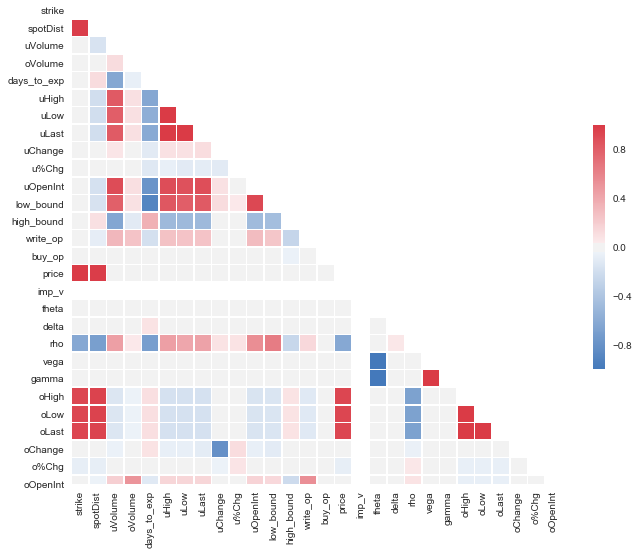

In [18]:
# visualization of call correlation matrix
CorrMtx(corr, dropDuplicates = True)

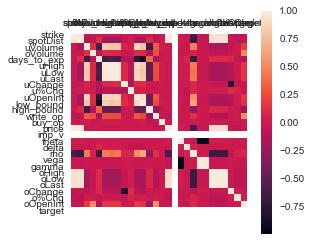

In [19]:
# visualization of call correlation matrix
plt.matshow(corr)
plt.xticks(range(len(scaled_df.columns)), scaled_df.columns)
plt.yticks(range(len(scaled_df.columns)), scaled_df.columns)
plt.colorbar()
plt.show()

In [20]:
# call map functions based on "Change" up/same/down
mapped_df = pd.concat([scaled_df['imp_v'], scaled_df['spotDist'], scaled_df['u%Chg'], scaled_df['oLast'], scaled_df['target']], axis=1)
mapped_df.head()

,imp_v,spotDist,u%Chg,oLast,target
0,0,1,41,0,HOLD
1,0,3,77,0,HOLD
2,0,5,13,0,HOLD
3,0,5,43,0,HOLD
4,0,6,23,0,HOLD


In [21]:
mapped_df.target.value_counts()

HOLD     10201
WRITE      148
BUY          1
Name: target, dtype: int64

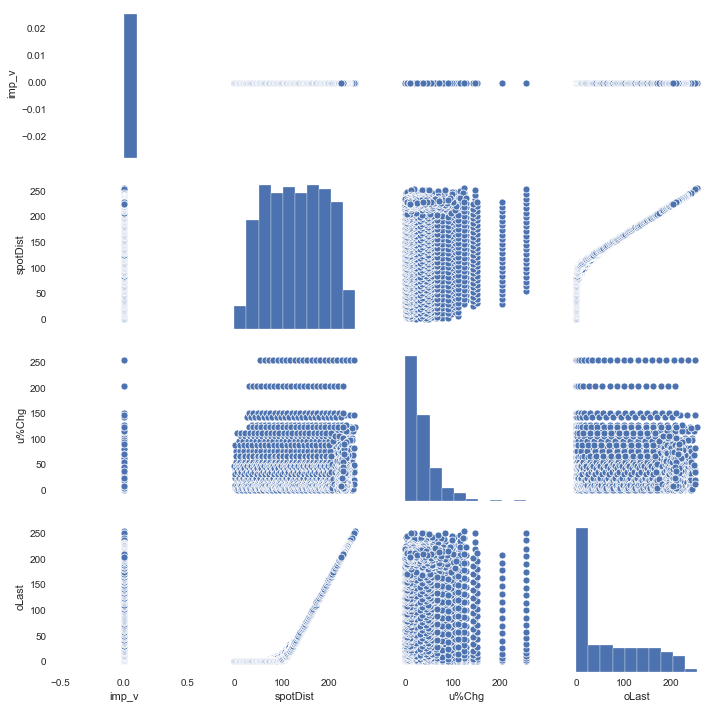

In [22]:
# visualize correlations
sns.pairplot(mapped_df.drop(columns=['target']))

### Resample

In [23]:
# resample
buy_df = mapped_df.loc[mapped_df['target']=='BUY']
hold_df = mapped_df.loc[mapped_df['target']=='HOLD'].sample(n=148, replace=True)
write_df = mapped_df.loc[mapped_df['target']=='WRITE']
resampled_df = pd.concat([buy_df,hold_df,write_df], axis=0)
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)
print('--before resample--')
print('mapped_df.shape:', mapped_df.shape)
print(mapped_df['target'].value_counts())
print('--after resample--')
print('resampled_df.shape:', resampled_df.shape)
print(resampled_df['target'].value_counts())
print()
print('resampled dataframe (to be exported)'.upper())
resampled_df

--before resample--
mapped_df.shape: (10350, 5)
HOLD     10201
WRITE      148
BUY          1
Name: target, dtype: int64
--after resample--
resampled_df.shape: (297, 5)
HOLD     148
WRITE    148
BUY        1
Name: target, dtype: int64

RESAMPLED DATAFRAME (TO BE EXPORTED)


,imp_v,spotDist,u%Chg,oLast,target
0,0,84,12,0,WRITE
1,0,126,3,34,HOLD
2,0,207,41,173,HOLD
3,0,97,9,3,WRITE
4,0,132,9,48,HOLD
5,0,208,62,176,HOLD
6,0,91,97,1,WRITE
7,0,86,43,0,WRITE
8,0,214,5,185,HOLD
9,0,123,5,35,HOLD


# Export

In [24]:
# export the call and put dfs
mapped_df.to_csv('/Users/lucas/Desktop/futures_options/mapped.csv', index=False)
resampled_df.to_csv('/Users/lucas/Desktop/futures_options/resampled.csv', index=False)